# Capítulo 4: Modelos de entrenamiento

<br><br>

Hasta ahora hemos tratado los modelos de aprendizaje automático y sus algoritmos de entrenamiento principalmente como cajas negras. 

Es posible que te haya sorprendido lo mucho que puedes hacer sin saber nada sobre lo que hay bajo el capó: optimizaste un sistema de regresión, mejoraste un clasificador de imágenes de dígitos e incluso construiste un clasificador de spam desde cero, todo sin saber cómo funcionan realmente. 

De hecho, en muchas situaciones no es necesario conocer los detalles de la implementación.

Sin embargo, tener una buena comprensión de cómo funcionan las cosas puede ayudarte a encontrar rápidamente el modelo apropiado, el algoritmo de entrenamiento adecuado para usar y un buen conjunto de hiperparámetros para tu tarea. 

Comprender lo que hay "bajo el capó" también le ayudará a depurar los problemas y a realizar el análisis de errores de manera más eficiente. 

Por último, la mayoría de los temas tratados en este capítulo serán esenciales para comprender, construir y entrenar las redes neuronales (discutido en la Parte II de este libro).

En este capítulo comenzaremos por ver el modelo de regresión lineal, uno de los modelos más simples que existen. Discutiremos dos formas muy diferentes de entrenarlo:

* Usando una ecuación de "**forma cerrada**"⁠ que **calcule directamente** los parámetros del modelo que mejor se ajustan al modelo al conjunto de entrenamiento (es decir, los parámetros del modelo que minimizan la función de costo sobre el conjunto de entrenamiento).


* Utilizando un enfoque de optimización **iterativo** llamado **descenso de gradiente** (GD) que ajusta **gradualmente** los parámetros del modelo para minimizar la función de costo sobre el conjunto de entrenamiento, eventualmente convergiendo con el mismo conjunto de parámetros que el primer método. Veremos algunas variantes de descenso de gradiente que usaremos una y otra vez cuando estudiemos las redes neuronales en la Parte II: **GD de lote, GD de minibate y GD estocástico**.


A continuación, veremos la **regresión polinómica**, un modelo más complejo que puede adaptarse a conjuntos de datos **no lineales**. 

Dado que este modelo tiene **más parámetros que la regresión lineal**, es más propenso a **sobreajustar** los datos de entrenamiento. 

Exploraremos cómo detectar si este es el caso o no utilizando **curvas de aprendizaje**, y luego veremos varias **técnicas de regularización** que pueden reducir el riesgo de sobreadaptar el conjunto de entrenamiento.

Por último, examinaremos dos **modelos más que se utilizan** comúnmente para las tareas de **clasificación**: **regresión logística y regresión softmax**.


### ------------------------ ADVERTENCIA ------------------------

Habrá bastantes ecuaciones matemáticas en este capítulo, utilizando nociones básicas de álgebra lineal y cálculo. 

Para entender estas ecuaciones, necesitarás saber qué son los vectores y las matrices; cómo transponerlos, multiplicarlos e invertirlos; y qué son las derivadas parciales. 

Si no estás familiarizado con estos conceptos, consulte los tutoriales introductorios de álgebra lineal y cálculo disponibles como cuadernos Jupyter en el material complementario en línea. 

Para aquellos que son realmente alérgicos a las matemáticas, aún así deben pasar por este capítulo y simplemente omitir las ecuaciones; con suerte, el texto será suficiente para ayudarle a entender la mayoría de los conceptos.

## Regresión Lineal

</bre/>
En el capítulo 1 se analizó un modelo de **regresión simple** para comprobar la satisfacción con la vida:

**<center>satif_vida = θ0 + θ1 × GDP_per_capita</center>**

Es solo una función lineal (línea recta) con una sola característica de entrada y dos parámetros:

- Característica: `GDP_per_capita`
- Parámetros: `θ0` y `θ1`

Un modelo lineal funciona haciendo una predicción calculando una suma ponderada de características de entrada más una constante (sesgo o término de intersección).


### Ecuación 4-1: Predicción del modelo de Regresión Lineal
</br>

**<center>y = θ0 + θ1X1 + θ2X2 + ... + θnXn</center>**

* **y** = valor predicho
* **n** = número de características
* **Xi** = valor de la primera característica
* **θj** = parámetro del modelo j, incluido el término de sesgo θ0 y los pesos de características θ1, θ2, ..., θn.

(Y esto se puede escribir de forma más concisa usando una forma vectorizada).


### Ecuación 4-2: Predicción del modelo de Regresión Lineal (FORMA VECTORIAL)
</br>

**<center>y = hθ(X) = θ*X</center>**

* **hθ** = función de hipótesis, que usa los parámetros del modelo θ
* **θ** = número de características
* **X** = vector de parámetros del modelo, que contiene el término de sesgo θ0 y los pesos de características θ1 a θn.
* **θ*X** = producto punto de los vectores θ y X, que es igual a θ0x0 + θ1x1 + θ2x2 + ... θnxn

</br></br>
**---------------------- NOTA ------------------------**

En el aprendizaje automático, los vectores a menudo se representan como vectores de columna (row-vector), que son matrices 2D con una sola columna.

Si **θ** y **x** son vectores de columna, entonces la predicción es `y = θ^T*X`, donde `θ^T` es la transposición de `θ` (un vector fila en lugar de un vector columna) y `θ^T*X` es la multiplicación de la matriz de `θ^T` y `X`.

Por supuesto, es la misma predicción, excepto que ahora se representa como una matriz de una sola celda en lugar de un valor escalar. 

**------------------------------------------------------**
</br>

Vale, ese es el modelo de regresión lineal, pero ¿cómo lo entrenamos? Bueno, recuerda que entrenar un modelo significa establecer sus parámetros para que el modelo se ajuste mejor al conjunto de entrenamiento. 

Para este propósito, primero necesitamos una medida de qué tan bien (o mal) se ajusta el modelo a los datos de entrenamiento. 

En el capítulo 2 vimos que la medida de rendimiento más común de un modelo de regresión es el **error cuadrado medio** de la raíz. 

Por lo tanto, para entrenar un modelo de regresión lineal, necesitamos encontrar el valor de θ que minimice el **RMSE**. 

En la práctica, es más sencillo minimizar el error medio al cuadrado (MSE) que el RMSE, y conduce al mismo resultado (porque el valor que minimiza una función positiva también minimiza su raíz cuadrada).

**---------------------- ADVERTENCIA ------------------------**

Los algoritmos de aprendizaje a menudo optimizarán una función de pérdida diferente durante el entrenamiento que la medida de rendimiento utilizada para evaluar el modelo final. Esto se debe generalmente a que la función es más fácil de optimizar y/o porque tiene términos adicionales necesarios solo durante el entrenamiento (por ejemplo, para la regularización). Una buena métrica de rendimiento está lo más cerca posible del objetivo comercial final. Una buena pérdida de entrenamiento es fácil de optimizar y está fuertemente correlacionada con la métrica. Por ejemplo, los clasificadores a menudo se entrenan utilizando una función de costo como la pérdida de registro (como verá más adelante en este capítulo), pero se evalúan utilizando precisión/retirada. La pérdida de registro es fácil de minimizar, y hacerlo generalmente mejorará la precisión/retirada.

**----------------------------------------------------------------**

El MSE de una hipótesis de regresión lineal hθ en un set de entrenamiento ´X´ se calcula utilizando la ecuación 4-3.


### Ecuación 4-3: Función de coste de MSE para un modelo de regresión lineal
</br>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <mtext>MSE</mtext>
    <mrow>
      <mo>(</mo>
      <mi mathvariant="bold">X</mi>
      <mo>,</mo>
      <msub><mi>h</mi> <mi mathvariant="bold">θ</mi> </msub>
      <mo>)</mo>
    </mrow>
    <mo>=</mo>
    <mstyle scriptlevel="0" displaystyle="true">
      <mfrac><mn>1</mn> <mi>m</mi></mfrac>
    </mstyle>
    <munderover><mo>∑</mo> <mrow><mi>i</mi><mo>=</mo><mn>1</mn></mrow> <mi>m</mi> </munderover>
    <msup><mrow><mo>(</mo><msup><mi mathvariant="bold">θ</mi> <mo>⊺</mo> </msup><msup><mi mathvariant="bold">x</mi> <mrow><mo>(</mo><mi>i</mi><mo>)</mo></mrow> </msup><mo>-</mo><msup><mi>y</mi> <mrow><mo>(</mo><mi>i</mi><mo>)</mo></mrow> </msup><mo>)</mo></mrow> <mn>2</mn> </msup>
  </mrow>
</math>

MSE(X,hθ) = 1/m * SUM i to m (θT * X^i - y^i)^2

<a href="https://imgbb.com/"><img src="https://i.ibb.co/qsT73Cj/Captura-de-pantalla-2023-08-18-a-las-20-00-06.png" alt="Captura-de-pantalla-2023-08-18-a-las-20-00-06" border="0"></a><br /><a target='_blank' href='https://imgbb.com/'></a><br />

La mayoría de estas anotaciones se presentaron en el capítulo 2. La única diferencia es que escribimos hθ en lugar de solo h para dejar claro que el modelo está parametrizado por el vector θ. Para simplificar las anotaciones, solo escribiremos MSE(θ) en lugar de MSE(X, hθ).

### Ecuación normal

Para encontrar el valor de θ que minimiza el MSE, existe una solución de forma cerrada, en otras palabras, una ecuación matemática que da el resultado directamente. 

Esto se llama **ecuación normal** y **nunca vamos a calcular en problemas complicados** porque es increiblemente lento (imposible computacionalmente) y tendremos que saber como acercarnos a la solución sin calcular esto.


### Ecuación 4-4: Ecuación Normal


<a href="https://imgbb.com/"><img src="https://i.ibb.co/51vHrfN/Captura-de-pantalla-2023-08-18-a-las-20-06-44.png" alt="Captura-de-pantalla-2023-08-18-a-las-20-06-44" border="0"></a>

Donde:

* **θ** = valor de θ que minimiza la función de coste.
* **y** = vector de valores onjetivo que contiene **y(1)** a **y(m)**.

In [1]:
# Generamos algunos datos con forma lineal para probar que la ecuación funciona
# Conjunto de datos lineal generado al azar.

import numpy as np

np.random.seed(42)
m = 100  # número de instancias
X = 2 * np.random.rand(m, 1)  # vector columna
y = 4 + 3 * X + np.random.randn(m, 1)  # vector columna

![data_points_lineal](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0401.png)

Ahora vamos a calcular **θ^** usando la **Ecuación Normal**. 

Usamos la función `inv()` del módulo de álgebra lineal de NumPy  (`np.linalg`) para hacer la inversa de la matriz, y el método `dot()` para la multiplicación de matrices.

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

### -------------------------- NOTA --------------------------

El operador `@` realiza la multiplicación de matrices. 

Si **A** y **B** son matrices NumPy, entonces **A @ B** es equivalente a `np.matmul(A, B)`. 

Muchas otras bibliotecas, como TensorFlow, PyTorch y JAX, también admiten el operador **@**. Sin embargo, no puede usar @ en arreglos puros de Python (es decir, listas de listas).

### -------------------------------------------------------------

La función que usamos para generar los datos es `y = 4+3x1 + ruido_gaussiano`.
Veamos que encontró la ecuación:

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

Habríamos esperado **(θ0 = 4** y **θ1 = 3)** en lugar de **(θ0 = 4.215** y **θ1 = 2.770)**. 

Lo suficientemente cerca, pero el ruido hizo imposible recuperar los parámetros exactos de la función original. 

**Cuanto más pequeño y ruidoso sea el conjunto de datos, más difícil se vuelve**.

Ahora podemos hacer predicciones usando **θ^**:

In [4]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # agregar x0 = 1 a cada instancia
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

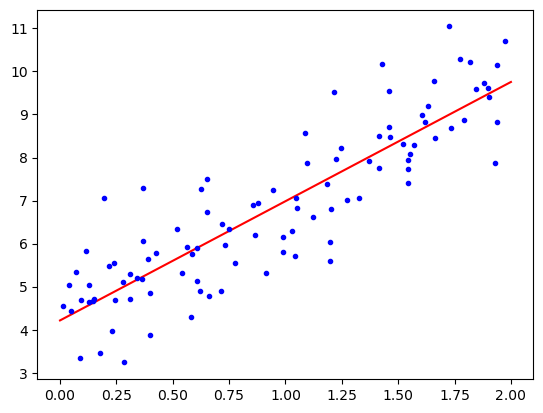

In [5]:
# Visualizamos las predicciones del modelo de R.Lineal

import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.show()

Realizar una regresión lineal con **Scickit-Learn**:

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Observa que Scikit-Learn separa el término de bias (`intercept_`) de los pesos de características (`coef_`).

La clase LinearRegression se basa en la función `scipy.linalg.lstsq()` (el nombre se refiere a "mínimos cuadrados"), a la que se puede llamar directamente:



In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

Esta función calcula **θ^ = X+y**, donde **X+** es la pseudoinversa de **X** (específicamente la inversa de Moore-Penrose).

Puedes usar `np.linalg.pinv()` para hacer la pseudoinversa directamente:

In [8]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

La pseudoinversa en sí misma se calcula utilizando una técnica de factorización de matriz estándar llamada descomposición de valores singulares (**SVD**) que puede descomponer la matriz del conjunto de entrenamiento **X** en la multiplicación de matrices de tres matrices U Σ V⊺ (`vernumpynumpy.linalg.svd()`). 

La pseudoinversa se calcula como:

**<center>X+ = VΣ+U⊺</center>** 

Para calcular la matriz Σ+, el algoritmo toma Σ y establece en cero todos los valores más pequeños que un pequeño valor de umbral, luego reemplaza todos los valores distintos de cero con su inverso y, finalmente, transpone la matriz resultante. 

Este enfoque es más eficiente que calcular la ecuación Normal, además de que maneja bien los casos de borde: de hecho, la ecuación Normal puede no funcionar si la matriz **X⊺X** no es invertible (es decir, singular), como si m < n o si algunas características son redundantes, pero el pseudoinverse siempre está definido.


### Complejidad computacional
</br></br>
La ecuación normal calcula la inversa de **X⊺ X**, que es una matriz (n + 1) × (n + 1) (donde n es el número de características). 

La complejidad computacional de invertir dicha matriz suele ser de _O(n2.4) a O(n3)_, dependiendo de la implementación. 

En otras palabras, si duplicas el número de características, multiplicas el tiempo de cálculo por aproximadamente 22,4 = 5,3 a 23 = 8.

El enfoque SVD utilizado por la clase `LinearRegression` de Scikit-Learn se trata de _O(n2)_. 

**Si duplicas la cantidad de características, multiplica el tiempo de cálculo por aproximadamente 4**.

#### ---------------------------------- ADVERTENCIA ----------------------------------

Tanto la **ecuación normal** como el enfoque **SVD** se **ralentizan** mucho cuando el número de características **crece** (por ejemplo, 100.000). 

En el lado positivo, **ambos son lineales con respecto al número de instancias** en el conjunto de entrenamiento (son _O(m)_), por lo que manejan grandes conjuntos de entrenamiento de manera eficiente, siempre que puedan caber en la memoria.
### --------------------------------------------------------------------


Además, una vez que hayas entrenado tu modelo de regresión lineal (usando la ecuación normal o cualquier otro algoritmo), **las predicciones son muy rápidas: la complejidad computacional es lineal con respecto tanto al número de instancias en las que desea hacer predicciones como al número de características**. En otras palabras, hacer predicciones sobre el doble de casos (o el doble de características) tomará aproximadamente el doble de tiempo.

**<center>x2 características = x2 tiempo</center>**

#### Ahora veremos una forma muy diferente de entrenar un modelo de regresión lineal, que es más adecuado para los casos en los que hay un gran número de características o demasiadas instancias de entrenamiento para encajar en la memoria.

## Descenso del gradiente

</br></br>
El _descenso de gradiente_ es un algoritmo de optimización genérico capaz de encontrar **soluciones óptimas** para una amplia gama de problemas. 

La idea general del descenso del gradiente es **ajustar los parámetros de forma iterativa** para minimizar una **función de coste*.

Supongamos que estás perdido en las montañas en una densa niebla, y solo puedes sentir la pendiente del suelo debajo de tus pies. Una buena estrategia para llegar al fondo del valle rápidamente es ir cuesta abajo en dirección a la pendiente más empinada. 
Esto es exactamente lo que hace el descenso del gradiente: mide el gradiente local de la función de error con respecto al vector de parámetros θ, y va en la dirección del gradiente descendente. 
Una vez que el gradiente es cero (casi nunca pasa), ¡has alcanzado un mínimo!

En la práctica, comienzas por llenar θ con valores aleatorios (esto se llama inicialización aleatoria). 

Luego lo mejoras gradualmente, dando un paso a la vez, cada paso tratando de disminuir la función de costo (por ejemplo, el MSE), hasta que el algoritmo converge al mínimo.

![descenso_gradiente](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0403.png)

(_En esta representación del descenso de gradiente, los parámetros del modelo se inicializan al azar y se ajustan repetidamente para minimizar la función de costo; el tamaño del paso de aprendizaje es proporcional a la pendiente de la función de costo, por lo que los pasos se reducen gradualmente a medida que el costo se acerca al mínimo_)

</br></br>

Un parámetro importante en el descenso de gradiente es el tamaño de los pasos, determinado por el hiperparámetro de la **tasa de aprendizaje** o learning rate.

Si la tasa de aprendizaje es **demasiado pequeña**, entonces el algoritmo tendrá que pasar por **muchas iteraciones para converger**, lo que llevará mucho tiempo.

![small_learning_rate](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0404.png)

</br></br>

Por otro lado, si la tasa de aprendizaje es **demasiado alta**, podrías saltar a través del valle y terminar en el otro lado, posiblemente incluso más alto de lo que estabas antes. 
Esto podría hacer que el algoritmo **diverja** (no converja), con valores cada vez más grandes, al no encontrar una buena solución.

![big_learning_rate](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0405.png)

Además, no todas las funciones de coste parecen cuencos bonitos y normales. Puede haber agujeros, crestas, mesetas y todo tipo de terreno irregular, lo que dificulta la convergencia al mínimo. 

La siguiente figura muestra los dos **desafíos principales** con el descenso en pendiente. 

Si la inicialización aleatoria inicia el algoritmo a la **izquierda**, entonces convergerá a un mínimo local, que no es tan bueno como el mínimo global. 

Si comienza a la **derecha**, entonces llevará mucho tiempo cruzar la meseta. Y si te detienes demasiado pronto, nunca alcanzarás el mínimo global.

![desafios_descenso_gradiente](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0406.png)


Afortunadamente, la función de costo de MSE para un modelo de regresión lineal resulta ser una función **convexa**, lo que significa que si eliges dos puntos en la curva, el segmento de línea que los une nunca está por debajo de la curva. Esto implica que no hay mínimos locales, solo un mínimo global. 

También es una función continua con una pendiente que nunca cambia abruptamente.⁠

Estos dos hechos tienen una gran consecuencia: se garantiza que el descenso del gradiente se acerca arbitrariamente al mínimo global (si esperas lo suficiente y si la tasa de aprendizaje no es demasiado alta).

Si bien la función de costo tiene la forma de un tazón, puede ser un tazón alargado si las características tienen escalas muy diferentes. 

La siguiente imagen muestra el descenso en gradiente en un conjunto de entrenamiento donde las características 1 y 2 tienen la misma escala (a la izquierda), y en un conjunto de entrenamiento donde la característica 1 tiene valores mucho más pequeños que la característica 2 (a la derecha).⁠

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0407.png)

Como puedes ver, a la izquierda el algoritmo de descenso de gradiente va directamente hacia el mínimo, llegando así rápidamente, mientras que a la derecha primero va en una dirección casi ortogonal a la dirección del mínimo global, y termina con una larga marcha por un valle casi plano. 

Eventualmente alcanzará el mínimo, pero llevará mucho tiempo.

#### ----------------------------- ADVERTENCIA -----------------------------

Cuando uses el gradiente descendente, deberías asegurarte que todas las características tienen una escala similar (ej: usando `StandardScaler`), de lo contrario tardará mucho más en converger.
#### -----------------------------------------------------------------------------

Este diagrama también ilustra el hecho de que **entrenar un modelo significa buscar una combinación de parámetros del modelo que minimice una función de costo** (sobre el conjunto de entrenamiento). 

Es una búsqueda en el espacio de parámetros del modelo. 

Cuantos más parámetros tenga un modelo, más dimensiones tenga este espacio y más difícil sea la búsqueda: buscar una aguja en un pajar de 300 dimensiones es mucho más complicado que en 3 dimensiones. 

Afortunadamente, dado que la función de costo es convexa en el caso de la regresión lineal, la aguja está simplemente en la parte inferior del tazón.

## Descenso del gradiente por lotes (BATCH)

Para implementar el descenso de gradiente, es necesario **calcular el gradiente de la función de costo con respecto a cada parámetro del modelo θj**. 

En otras palabras, necesitas calcular cuánto cambiará la función de costo si cambias θj solo un poco. Esto se llama derivada parcial. 

Es como preguntar: "¿Cuál es la pendiente de la montaña bajo mis pies si miro hacia el este"? y luego hacer la misma pregunta mirando hacia el norte (y así sucesivamente para todas las demás dimensiones, si puedes imaginar un universo con más de tres dimensiones). 

La ecuación 4-5 calcula la derivada parcial del MSE con respecto al parámetro θj, señalado ∂ MSE(θ) / ∂θj.

### Ecuación 4-5: Derivadas parciales de la función de coste

<a href="https://ibb.co/z51jft4"><img src="https://i.ibb.co/Sx2WvZ3/Captura-de-pantalla-2023-08-20-a-las-21-19-22.png" alt="Captura-de-pantalla-2023-08-20-a-las-21-19-22" border="0"></a>

En lugar de calcular estas derivadas parciales individualmente, puedes usar la ecuación 4-6 para calcularlas todas de una sola vez. 

El vector de gradiente, señalado ∇θMSE(θ), contiene todas las derivadas parciales de la función de coste (una para cada parámetro del modelo).

### Ecuación 4-6: Vector de gradiente de la función de coste

<a href="https://ibb.co/zPx8DbB"><img src="https://i.ibb.co/CV8JDvY/Captura-de-pantalla-2023-08-20-a-las-21-20-53.png" alt="Captura-de-pantalla-2023-08-20-a-las-21-20-53" border="0"></a>
</br>

#### ---------------------- ADVERTENCIA -------------------
</br>

¡Ten en cuenta que esta fórmula implica cálculos sobre el conjunto completo de entrenamiento X, en cada paso de descenso de gradiente! 

Esta es la razón por la que el algoritmo se llama descenso de gradiente **por lotes**: **utiliza todo el lote de datos de entrenamiento en cada paso** (en realidad, el descenso de gradiente completo probablemente sería un mejor nombre). 

Como resultado, es **terriblemente lento en conjuntos de entrenamiento muy grandes** (en breve veremos algunos algoritmos de descenso de gradiente mucho más rápidos). 

Sin embargo, el descenso del gradiente se escala bien con el número de características; entrenar un modelo de regresión lineal cuando hay cientos de miles de características es mucho más rápido usando el descenso del gradiente que usando la ecuación normal o la descomposición de SVD.

#### -----------------------------------------------------------

Una vez que tengas el vector de gradiente, que apunta cuesta arriba, simplemente ve en la dirección opuesta para ir cuesta abajo. 

Esto significa restar ∇θMSE(θ) de θ. 

Aquí es donde entra en juego la tasa de aprendizaje η:⁠4 multiplica el vector de gradiente por η para determinar el tamaño del paso de descenso (Ecuación 4-7).

### Ecuación 4-7: Paso (step) del descenso del gradiente

<a href="https://imgbb.com/"><img src="https://i.ibb.co/1MHnNPW/Captura-de-pantalla-2023-08-20-a-las-21-24-54.png" alt="Captura-de-pantalla-2023-08-20-a-las-21-24-54" border="0"></a>

Vamos a hacer una implementación básica de este algoritmo:

In [9]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # número de instancias

np.random.seed(42)
theta = np.random.randn(2, 1)  # parámetros del modelo inicializados aleatoriamente

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

No fue muy dificil! Cada iteración del conjunto de entrenamiento es llamada "**época**".

Vamos a ver el resultado de `theta`:

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

Ey, ¡eso es exactamente lo que encontró la ecuación normal! 

El descenso en gradiente funcionó perfectamente. Pero, ¿y si hubieras usado una tasa de aprendizaje diferente (`eta`)? 

La figura siguiente muestra los primeros 20 pasos de descenso de gradiente utilizando tres tasas de aprendizaje diferentes. 

La línea en la parte inferior de cada gráfico representa el punto de partida aleatorio, luego cada época está representada por una línea cada vez más oscura.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0408.png)

- A la **izquierda**, la tasa de aprendizaje es demasiado baja: el algoritmo finalmente llegará a la solución, pero llevará mucho tiempo. 

- En el **medio**, la tasa de aprendizaje se ve bastante bien: en solo unas pocas épocas, ya ha convergido hacia la solución. 

- A la **derecha**, la tasa de aprendizaje es demasiado alta: el algoritmo diverge, saltando por todas partes y en realidad se aleja cada vez más de la solución en cada paso.

</br>

Para **encontrar una buena tasa de aprendizaje**, puede utilizar la **búsqueda en grill** (`SearchGrill` en el capítulo 2). Sin embargo, es posible que desee **limitar el número de épocas** para que la búsqueda en la cuadrícula pueda eliminar los modelos que tardan demasiado en converger.

Puede que te preguntes cómo establecer el **número de épocas**: 

Si es demasiado **bajo**, todavía estarás **lejos de la solución** óptima cuando el algoritmo se detenga; pero si es demasiado **alto**, **perderás el tiempo mientras los parámetros del modelo ya no cambian**. 

Una solución simple es establecer un número muy grande de épocas, pero interrumpir el algoritmo cuando el vector de gradiente se vuelve diminuto, es decir, cuando su norma se vuelve más pequeña que un número diminuto ε (llamado _tolerancia_), porque esto sucede cuando el descenso del gradiente (casi) ha alcanzado el mínimo.

#### --------------------- TASA DE CONVERGENCIA -------------------------
Cuando la función de costo es convexa y su pendiente no cambia abruptamente (como es el caso de la función de costo de MSE), el descenso del gradiente de lote con una tasa de aprendizaje fija eventualmente convergerá a la solución óptima, pero es posible que tenga que esperar un tiempo: puede tomar iteraciones O(1/ε) para alcanzar el óptimo dentro de un rango de Si divides la tolerancia entre 10 para tener una solución más precisa, entonces es posible que el algoritmo tenga que funcionar unas 10 veces más tiempo.
#### ------------------------------------------------------------------------------

## Descenso del gradiente estocástico
</br></br>
El principal problema con el descenso del gradiente por **lotes** (batch) es el hecho de que **utiliza todo el conjunto de entrenamiento** para calcular los gradientes en cada paso, lo que lo hace **muy lento cuando el conjunto de entrenamiento es grande**. 

En el extremo opuesto, el descenso del gradiente **estocástico** elige una **instancia aleatoria** en el conjunto de entrenamiento en cada paso y calcula los gradientes basados **solo en esa única instancia**. 

Obviamente, trabajar en una sola instancia a la vez hace que el algoritmo sea mucho más rápido porque tiene muy pocos datos para manipular en cada iteración. 

También hace posible entrenar en grandes conjuntos de entrenamiento, ya que solo una instancia debe estar en la memoria en cada iteración (el GD estocástico se puede implementar como un algoritmo fuera del núcleo; véase el capítulo 1).

Por otro lado, debido a su naturaleza estocástica (es decir, aleatoria), este algoritmo es **mucho menos regular** que el descenso del gradiente de lotes: en lugar de disminuir suavemente hasta que alcance el mínimo, la función de costo rebotará hacia arriba y hacia abajo, disminuyendo solo en promedio. 

Con el tiempo terminará muy cerca del mínimo, pero una vez que llegue allí, **continuará rebotando, sin asentarse** (ver figura siguiente). 

Una vez que el algoritmo se detenga, los valores finales de los parámetros serán buenos, pero **no óptimos**.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0409.png)

(_Con el descenso de gradiente estocástico, cada paso de entrenamiento es mucho más rápido, pero también mucho más estocástico que cuando se usa el descenso de gradiente por lotes_)

Cuando la función de costo es muy irregular, esto en realidad puede ayudar al algoritmo a saltar de los mínimos locales, por lo que el descenso del gradiente estocástico tiene una mejor oportunidad de encontrar el mínimo global que el descenso del gradiente por lotes.

Por lo tanto, la aleatoriedad es buena para escapar del 
óptimo local, pero mala porque significa que el algoritmo nunca puede establecerse al mínimo. 

Una solución a este dilema es reducir gradualmente la tasa de aprendizaje. Los pasos comienzan a lo grande (lo que ayuda a progresar rápidamente y a escapar de los mínimos locales), luego se hacen cada vez más pequeños, lo que permite que el algoritmo se establezca en el mínimo global. 
Este proceso es similar al recocido simulado, un algoritmo inspirado en el proceso en la metalurgia del recocido, donde el metal fundido se enfría lentamente. 

La función que determina la tasa de aprendizaje en cada iteración se llama programa de aprendizaje. 

Si la tasa de aprendizaje se reduce demasiado rápido, puede quedar atrapado en un mínimo local, o incluso terminar congelado a mitad del mínimo. 

Si la tasa de aprendizaje se reduce demasiado lentamente, puede saltar alrededor del mínimo durante mucho tiempo y terminar con una solución subóptima si detiene el entrenamiento demasiado pronto.

Este código implementa el descenso del gradiente estocástico utilizando un programa de aprendizaje simple:

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

Por convención, iteramos por rondas de m iteraciones; cada ronda se llama una época, como antes. 

Mientras que el código de descenso de gradiente por lotes iteró 1000 veces a través de todo el conjunto de entrenamiento, este código pasa por el conjunto de entrenamiento solo 50 veces y alcanza una solución bastante buena:

In [12]:
theta

array([[4.21076011],
       [2.74856079]])

Tenga en cuenta que, dado que las instancias se eligen al azar, algunas instancias pueden elegirse varias veces por época, mientras que otras pueden no elegirse en absoluto. 

Si quieres estar seguro de que el algoritmo pasa por cada instancia en cada época, otro enfoque es barajar el conjunto de entrenamiento (asegurándose de barajar las características de entrada y las etiquetas de forma conjunta), luego pasar por él instancia por instancia, luego barajarlo de nuevo, y así sucesivamente. Sin embargo, este enfoque es más complejo y, en general, no mejora el resultado.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0410.png)

Figura 4-10 (_Los primeros 20 pasos del descenso del gradiente estocástico_)



#### ----------------------------- ADVERTENCIA --------------------------------

Cuando se utiliza el descenso del gradiente estocástico, las instancias de entrenamiento deben ser independientes y distribuidas de manera idéntica (IID) para garantizar que los parámetros se tiren hacia el óptimo global, en promedio. 
Una forma sencilla de garantizar esto es barajar las instancias durante el entrenamiento (por ejemplo, elegir cada instancia al azar o barajar el conjunto de entrenamiento al comienzo de cada época). 
Si no baraja las instancias, por ejemplo, si las instancias están ordenadas por etiqueta, entonces SGD comenzará optimizando para una etiqueta, luego la siguiente, y así sucesivamente, y no se ajustará cerca del mínimo global.
#### --------------------------------------------------------------------------------


Para realizar una regresión lineal utilizando GD estocástico con Scikit-Learn, puede utilizar la clase `SGDRegressor`, que por defecto es la optimización de la función de costo de MSE. 

El siguiente código se ejecuta durante un máximo de 1000 épocas (`max_iter`) o hasta que la pérdida cae en menos de 10-5 (`tol`) durante 100 épocas (`n_iter_no_change`). 

Comienza con una tasa de aprendizaje de 0,01 (`eta0`), utilizando el horario de aprendizaje predeterminado (diferente del que usamos). Por último, no utiliza ninguna regularización (`penalty=None`; más detalles sobre esto en breve):

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() porque fit() espera etiquetas de 1D

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

Una vez más, encuentras una solución bastante cercana a la devuelta por la Normalequation:

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

#### ------------------------------------ TIP ------------------------------------

Todos los estimadores de Scikit-Learn se pueden entrenar usando el método `fit()`, pero algunos estimadores también tienen un método `part_fit()` al que se puede llamar para ejecutar una única ronda de entrenamiento en una o más instancias (ignora hiperparámetros como `max_iter` o `tol`). . 

Llamar repetidamente a `part_fit()` entrenará gradualmente el modelo. Esto resulta útil cuando necesita más control sobre el proceso de formación. 

Otros modelos tienen en su lugar un hiperparámetro `warm_start` (y algunos tienen ambos): si estableces `warm_start=True`, llamar al método `fit()` en un modelo entrenado no restablecerá el modelo; simplemente continuará entrenando donde lo dejó, respetando hiperparámetros como `max_iter` y `tol`. 

Tenga en cuenta que `fit()` restablece el contador de iteraciones utilizado por el programa de aprendizaje, mientras que `parcial_fit()` no lo hace.
#### ---------------------------------------------------------------------

## Descenso de gradiente por Mini-Lotes (minibatches)
</br></br>
El último algoritmo de descenso de gradiente que veremos se llama descenso de gradiente de mini lotes. Es sencillo una vez que conoces el descenso del gradiente estocástico y por lotes: en cada paso, en lugar de calcular los gradientes basados en el conjunto de entrenamiento completo (como en el GD por lotes) o basados en una sola instancia (como en el GD estocástico), el GD de minibatería calcula los gradientes en pequeños conjuntos aleatorios de instancias

El progreso del algoritmo en el espacio de parámetros es menos errático que con el GD estocástico, especialmente con minilotes bastante grandes. Como resultado, el GD en minilote terminará caminando un poco más cerca del mínimo que el GD estocástico, pero puede ser más difícil para él escapar de los mínimos locales (en el caso de problemas que sufren de mínimos locales, a diferencia de la regresión lineal con la función de costo de MSE). La figura 4-11 muestra los caminos tomados por los tres algoritmos de descenso de gradiente en el espacio de parámetros durante el entrenamiento. Todos terminan cerca del mínimo, pero el camino del lote GD en realidad se detiene en el mínimo, mientras que tanto el GD estocástico como el GD de minilote continúan caminando. Sin embargo, no olvides que el GD por lotes toma mucho tiempo para dar cada paso, y el GD estocástico y el GD de mini-lote también alcanzarían el mínimo si usaras un buen horario de aprendizaje.


![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0411.png)

<center>(Figura 4-11. Rutas de descenso de gradiente en el espacio de parámetros)</center>

La tabla 4-1 compara los algoritmos que hemos discutido hasta ahora para la regresión lineal⁠ (recuerde que m es el número de instancias de entrenamiento y n es el número de características).

_Tabla 4-1. Comparación de algoritmos para regresión lineal_

| **Algoritmo**       | **m grande** | **Soporte fuera del núcleo** | **n grande** | **Hiperparámetros** | **Requiere escalado** | **Scikit-Learn**    |
|-----------------|----------|--------------------------|----------|-----------------|-------------------|-----------------|
| Ecuación normal | Rapido   | No                       | Lento    | 0               | No                | N/A             |
| SVD             | Rapido   | No                       | Lento    | 0               | No                | LinearRegresion |
| Batch GD        | Lento    | No                       | Rapido   | 2               | Yes               | N/A             |
| SGD             | Rapido   | Si                       | Rapido   | >=2             | Yes               | SGDRegressor    |
| Mini-batch GD   | Rapido   | Si                       | Rapido   | >=2             | Yes               | N/A             |

</br></br>
Casi no hay diferencia después del entrenamiento: todos estos algoritmos terminan con modelos muy similares y hacen predicciones exactamente de la misma manera.

## Regresión Polinómica

**¿Qué pasa si tus datos son más complejos que una línea recta?** Sorprendentemente, puedes usar un modelo lineal para ajustar los datos no lineales. Una forma sencilla de hacer esto es agregar poderes de cada característica como nuevas características, y luego entrenar un modelo lineal en este conjunto extendido de características. Esta técnica se llama **regresión polinómica**.

Echemos un vistazo a un ejemplo. 
En primer lugar, generaremos algunos datos no lineales (ver Figura 4-12), basados en una ecuación cuadrática simple, que es una ecuación de la forma **y = ax² +bx + c**, más algo de ruido:

In [15]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0412.png)

_Figura 4-12. Conjunto de datos no lineales y ruidoso generado_

Es evidente que una línea recta nunca se ajustará correctamente a estos datos. Entonces, usemos la clase `PolynomialFeatures` de Scikit-Learn para transformar nuestros datos de entrenamiento, agregando el cuadrado (polinomio de segundo grado) de cada característica en el conjunto de entrenamiento como una nueva característica (en este caso solo hay una característica):

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [17]:
X_poly[0]

array([-0.75275929,  0.56664654])

`X_poly` ahora contiene la característica original de `X` más el cuadrado de esta característica. 

Ahora podemos ajustar un modelo de `LinearRegression` a estos datos de entrenamiento extendidos (Figura 4-13):

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0413.png)

No nada está mal: las estimaciones del modelo **y^ = 0.56(x1)^2 + 0.93(x1) + 1.78** cuando, de hecho, la función original era y = 0.5(x1)^2 + 1.0(x1) + 2.0 + RuidoGausiano.

Tenga en cuenta que cuando hay varias características, la regresión polinómica es capaz de encontrar relaciones entre características, algo que un modelo de regresión lineal simple no puede hacer. Esto es posible gracias al hecho de que PolynomialFeatures también agrega todas las combinaciones de características hasta el grado dado. Por ejemplo, si hubiera dos características a y b, `PolynomialFeatures` con `degree=3` no solo agregaría las características _a2, a3, b2 y b3_, sino también las combinaciones _ab, a2b y ab2_.

#### ------------------------------ ADVERTENCIA ---------------------------------
`PolynomialFeatures(degree=d)`¡Transforma una matriz que contiene _n_ características en una matriz que contiene _(n + d)! / d! n!_ características, donde _n!_ es el factorial de _n_, igual a _1 × 2 × 3 × ⋯ ×n_. 

¡Cuidado con la explosión combinatoria del número de características!
#### ----------------------------------------------------------------------------------

## Curvas de aprendizaje

Si realiza una regresión polinómica de alto grado, es probable que ajuste los datos de entrenamiento mucho mejor que con la regresión lineal simple. Por ejemplo, la Figura 4-14 aplica un modelo polinómico de 300 grados a los datos de entrenamiento anteriores, y compara el resultado con un modelo lineal puro y un modelo cuadrático (polinomio de segundo grado). Observa cómo el modelo polinómico de 300 grados se mueve para acercarse lo más posible a las instancias de entrenamiento.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0414.png)

_Figura 4-14. Regresión polinómica de alto grado_

Este modelo de regresión polinómica de alto grado está sobreajustando severamente los datos de entrenamiento, mientras que el modelo lineal lo está encajando. El modelo que mejor se generalizará en este caso es el modelo cuadrático, que tiene sentido porque los datos se generaron utilizando un modelo cuadrático. Pero en general no sabrás qué función generó los datos, así que ¿cómo puedes decidir qué tan complejo debe ser tu modelo? ¿Cómo puedes saber que tu modelo está sobreajustando o no ajustando los datos?

En el capítulo 2, utilizó la validación cruzada para obtener una estimación del rendimiento de la generalización de un modelo. Si un modelo funciona bien en los datos de entrenamiento, pero se generaliza mal de acuerdo con las métricas de validación cruzada, entonces su modelo se está ajustando en exceso. Si funciona mal en ambos, entonces no se ajusta bien. Esta es una forma de saber cuándo un modelo es demasiado simple o demasiado complejo.

Otra forma de saberlo es observar las curvas de aprendizaje, que son gráficos del error de entrenamiento y del error de validación del modelo en función de la iteración de entrenamiento: simplemente evalúe el modelo a intervalos regulares durante el entrenamiento tanto en el conjunto de entrenamiento como en el conjunto de validación. y trazar los resultados. Si el modelo no se puede entrenar de forma incremental (es decir, si no admite `parcial_fit()` o `warm_start`), entonces debes entrenarlo varias veces en subconjuntos gradualmente más grandes del conjunto de entrenamiento.

Scikit-Learn tiene una útil función `learning_curve()` para ayudar con esto: entrena y evalúa el modelo mediante validación cruzada. De forma predeterminada, vuelve a entrenar el modelo en subconjuntos crecientes del conjunto de entrenamiento, pero si el modelo admite el aprendizaje incremental, puede configurar  `exploit_incremental_learning=True` al llamar a `learning_curve()` y, en su lugar, entrenará el modelo de forma incremental. La función devuelve los tamaños del conjunto de entrenamiento en los que evaluó el modelo y las puntuaciones de entrenamiento y validación que midió para cada tamaño y para cada pliegue de validación cruzada. Usemos esta función para observar las curvas de aprendizaje del modelo de regresión lineal simple (ver Figura 4-15):

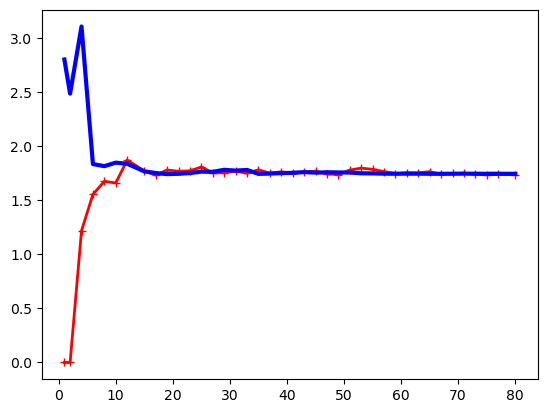

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.show()

Este modelo no es apto. Para ver por qué, primero echemos un vistazo al error de entrenamiento. Cuando solo hay una o dos instancias en el conjunto de entrenamiento, el modelo puede encajar perfectamente, por lo que la curva comienza en cero. Pero a medida que se agregan nuevas instancias al conjunto de entrenamiento, se hace imposible que el modelo se ajuste perfectamente a los datos de entrenamiento, tanto porque los datos son ruidosos como porque no son lineales en absoluto. Por lo tanto, el error en los datos de entrenamiento aumenta hasta que alcanza una meseta, momento en el que agregar nuevas instancias al conjunto de entrenamiento no hace que el error promedio sea mucho mejor o peor. Ahora veamos el error de validación. Cuando el modelo se entrena en muy pocas instancias de entrenamiento, es incapaz de generalizar correctamente, por lo que el error de validación es inicialmente bastante grande. Luego, a medida que se muestra al modelo más ejemplos de entrenamiento, aprende y, por lo tanto, el error de validación disminuye lentamente. Sin embargo, una vez más, una línea recta no puede hacer un buen trabajo al modelar los datos, por lo que el error termina en una meseta, muy cerca de la otra curva.

Estas curvas de aprendizaje son típicas de un modelo que no se ajusta bien. Ambas curvas han alcanzado una meseta; son cercanas y bastante altas.


#### -------------------------------------- TIP ---------------------------------------
Si su modelo no se ajusta bien a los datos de entrenamiento, añadir más ejemplos de entrenamiento no ayudará. Necesitas usar un modelo mejor o idear mejores características.
#### ----------------------------------------------------------------------------------

Ahora veamos las curvas de aprendizaje de un modelo polinómico de décimo grado en los mismos datos (Figura 4-16):

In [20]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0416.png)

_Figura 4-16. Curvas de aprendizaje para el modelo polinomial de décimo grado_

Estas curvas de aprendizaje se parecen un poco a las anteriores, pero hay dos diferencias muy importantes:

- El error en los datos de entrenamiento es mucho menor que antes.

- Hay un espacio entre las curvas. Esto significa que el modelo se desempeña significativamente mejor en los datos de entrenamiento que en los datos de validación, que es el sello distintivo de un modelo de sobreajuste. Sin embargo, si usaras un conjunto de entrenamiento mucho más grande, las dos curvas seguirían acercándose.

#### ------------------------------------ TIP ----------------------------------------
Una forma de mejorar un modelo de sobreajuste es alimentarlo con más datos de entrenamiento hasta que el error de validación llegue al error de entrenamiento.
#### ---------------------------------------------------------------------------------

#### ----------------- LA COMPENSACIÓN DE SESGO/VARIANZA--------------
Un resultado teórico importante de la estadística y el aprendizaje automático es el hecho de que el error de generalización de un modelo se puede expresar como la suma de tres errores muy diferentes:

* **sesgo**: Esta parte del error de generalización se debe a suposiciones erróneas, como asumir que los datos son lineales cuando en realidad son cuadráticos. Lo más probable es que un modelo de alto sesgo no se ajuste a los datos de entrenamiento

* **varianza**: Esta parte se debe a la excesiva sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento. Es probable que un modelo con muchos grados de libertad (como un modelo polinómico de alto grado) tenga una alta varianza y, por lo tanto, se ajuste demasiado a los datos de entrenamiento.

* **error irreducible**: Esta parte se debe a la ruidosidad de los datos en sí. La única manera de reducir esta parte del error es limpiar los datos (por ejemplo, arreglar las fuentes de datos, como los sensores rotos, o detectar y eliminar valores atípicos).

Aumentar la complejidad de un modelo normalmente aumentará su variación y reducirá su sesgo. Por el contrario, reducir la complejidad de un modelo aumenta su sesgo y reduce su variación. Esta es la razón por la que se llama una compensación.
#### -----------------------------------------------------------------------------------

# Modelos lineales regularizados

Como vio en los capítulos 1 y 2, una buena manera de reducir el sobreajuste es regularizar el modelo (es decir, restringirlo): cuantos menos grados de libertad tenga, más difícil será para él sobreadaptar los datos. Una forma sencilla de regularizar un modelo polinómico es reducir el número de grados polinómicos.

Para un modelo lineal, la regularización se logra normalmente restringiendo los pesos del modelo. Ahora veremos la regresión de la cresta, la regresión del lazo y la regresión de la red elástica, que implementan tres formas diferentes de restringir los pesos.


## Regresión de cresta

La regresión de cresta (también llamada _regularización de Tikhonov_) es una versión regularizada de la regresión lineal: un término de regularización igual a

<a href="https://imgbb.com/"><img src="https://i.ibb.co/JyV5zD1/Captura-de-pantalla-2023-08-24-a-las-5-14-15.png" alt="Captura-de-pantalla-2023-08-24-a-las-5-14-15" border="0"></a>

se añade al MSE. Esto obliga al algoritmo de aprendizaje no solo a ajustarse a los datos, sino también a mantener los pesos del modelo lo más pequeños posible. Tenga en cuenta que el plazo de regularización solo debe añadirse a la función de coste durante la formación. Una vez que se entrene el modelo, desea utilizar el MSE no regularizado (o el RMSE) para evaluar el rendimiento del modelo.

El hiperparámetro α controla cuánto quieres regularizar el modelo. Si α = 0, entonces la regresión de cresta es solo regresión lineal. Si α es muy grande, entonces todos los pesos terminan muy cerca de cero y el resultado es una línea plana que pasa por la media de los datos. 
La ecuación 4-8 presenta la función de costo de regresión de cresta.

### Ecuación 4-8. Función de costo de regresión de Ridge

<a href="https://imgbb.com/"><img src="https://i.ibb.co/TqbLD9J/Captura-de-pantalla-2023-08-24-a-las-15-33-38.png" alt="Captura-de-pantalla-2023-08-24-a-las-15-33-38" border="0"></a>

Tenga en cuenta que el término de sesgo θ0 no está regularizado (la suma comienza en i = 1, no en 0). 
Si definimos w como el vector de pesos de característica (θ1 a θn), entonces el término de regularización es igual a α(∥ w ∥2)2 / m, donde ∥ w ∥2 representa la norma ℓ2 del vector de peso.⁠ Para el gradiente de descenso.


#### -------------------------------- ADVERTENCIA ------------------------------------
Es importante escalar los datos (por ejemplo, utilizando un `StandardScaler`) antes de realizar la regresión de cresta, ya que es sensible a la escala de las características de entrada. 
Esto es cierto para la mayoría de los modelos regularizados.
#### ---------------------------------------------------------------------------------

La Figura 4-17 muestra varios modelos de cresta que se entrenaron con datos lineales muy ruidosos utilizando diferentes valores de α. 

A la izquierda, se utilizan modelos de crestas planas, que conducen a predicciones lineales. 

A la derecha, los datos primero se expanden usando `PolynomialFeatures(degree = 10)`, luego se escalan usando un `StandardScaler` y, finalmente, los modelos de cresta se aplican a las características resultantes: esto es regresión polinómica con regularización de cresta. 

Observa cómo el aumento de α conduce a predicciones más planas (es decir, menos extremas, más razonables), lo que reduce la varianza del modelo pero aumenta su sesgo.

![](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781098125967/files/assets/mls3_0417.png)

_Figura 4-17. Modelos lineales (izquierda) y polinómicos (derecha), ambos con varios niveles de regularización de crestas_

Al igual que con la regresión lineal, podemos realizar la regresión de cresta ya sea calculando una ecuación de forma cerrada o realizando un descenso de gradiente. Los pros y los contras son los mismos. La ecuación 4-9 muestra la solución de forma cerrada, donde **A** es la _matriz de identidad_ (n + 1) × (n + 1), excepto con un 0 en la celda superior izquierda, correspondiente al término de sesgo.

### Ecuación 4-9. Solución de forma cerrada de regresión de cresa

<a href="https://imgbb.com/"><img src="https://i.ibb.co/n77pXft/Captura-de-pantalla-2023-08-24-a-las-15-39-44.png" alt="Captura-de-pantalla-2023-08-24-a-las-15-39-44" border="0"></a>

Aquí se explica cómo realizar la regresión de cresta con Scikit-Learn utilizando una solución de forma cerrada (una variante de la ecuación 4-9 que utiliza una técnica de factorización matricial de André-Louis Cholesky):

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82899748]])

Y usando el descenso del gradiente estocástico:

In [22]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                        max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([4.82830117])

El hiperparámetro de penalización (`penalty`) establece el tipo de término de regularización que se utilizará. Especificar `"l2"` indica que desea que SGD agregue un término de regularización a la función de costo de MSE igual a alfa (`alpha`) multiplicado por el cuadrado de la norma ℓ2 del vector de peso. 
Esto es como la regresión de cresta, excepto que en este caso no hay división por m; es por eso que pasamos `alfa=0,1 / m`, para obtener el mismo resultado que `Ridge(alpha=0,1)`.


#### ------------------------------------ TIP ----------------------------
La clase `RidgeCV` también realiza una regresión de crestas, pero ajusta automáticamente los hiperparámetros mediante validación cruzada. Es más o menos equivalente a usar `GridSearchCV`, pero está optimizado para la regresión de crestas y se ejecuta mucho más rápido. Varios otros estimadores (en su mayoría lineales) también tienen variantes de CV eficientes, como `LassoCV` y `ElasticNetCV`.
#### --------------------------------------------------------------------


## Regresión de Lasso


La _contracción mínima absoluta_ y la regresión del operador de selección (generalmente llamada simplemente regresión de lazo) es otra versión regularizada de la regresión lineal: al igual que la regresión de cresta, agrega un término de regularización a la función de costo, pero utiliza la norma ℓ1 del vector de peso en lugar del cuadrado de la norma �� Tenga en cuenta que la norma ℓ1 se multiplica por 2α, mientras que la norma ℓ2 se multiplicó por α / m en la regresión de crestas. 

Estos factores se eligieron para garantizar que el valor óptimo de α sea independiente del tamaño del conjunto de entrenamiento: diferentes normas conducen a diferentes factores (consulte el número 15657 de Scikit-Learn para obtener más detalles).

### Ecuación 4-10. Función de coste de regresión de lasso